# CODSOFT

TASK 2 : - MOVIE RATING PREDICTION USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('C:\\Users\\DIYANN\\Downloads\\IMDb Movies India.csv',encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


DATA PRE PROCEESING

In [4]:
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
genre=df['Genre']
genre
genres=df['Genre'].str.split(',',expand=True)
genres

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [16]:
from collections import Counter

genre_list = [genre for genre in genres.values.flatten() if genre is not None]
# Use Counter to count occurrences of each genre
genre_counts = Counter(genre_list)
# Sort the genre counts by genre name
sorted_genre_counts = dict(sorted(genre_counts.items()))
for genre, count in sorted_genre_counts.items():
    print(f"{genre}: {count}")

 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [17]:
genresPie = df['Genre'].value_counts()
genresPie.head(10)

Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Name: Genre, dtype: int64

In [18]:
genrePie = pd.DataFrame(genresPie.items(), columns=['Genre', 'Count'])
genrePie.head(10)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [19]:
df["Votes"] = df["Votes"].str.replace(',', '').astype(int)
df["Votes"].head(10)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
Name: Votes, dtype: int32

In [20]:
directors = df["Director"].value_counts()
directors.head(10)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: Director, dtype: int64

In [22]:
actors = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().dropna().value_counts()
actors.head(10)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Ajay Devgn             92
Rekha                  92
dtype: int64

DATA VIZUALIZATION

In [23]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

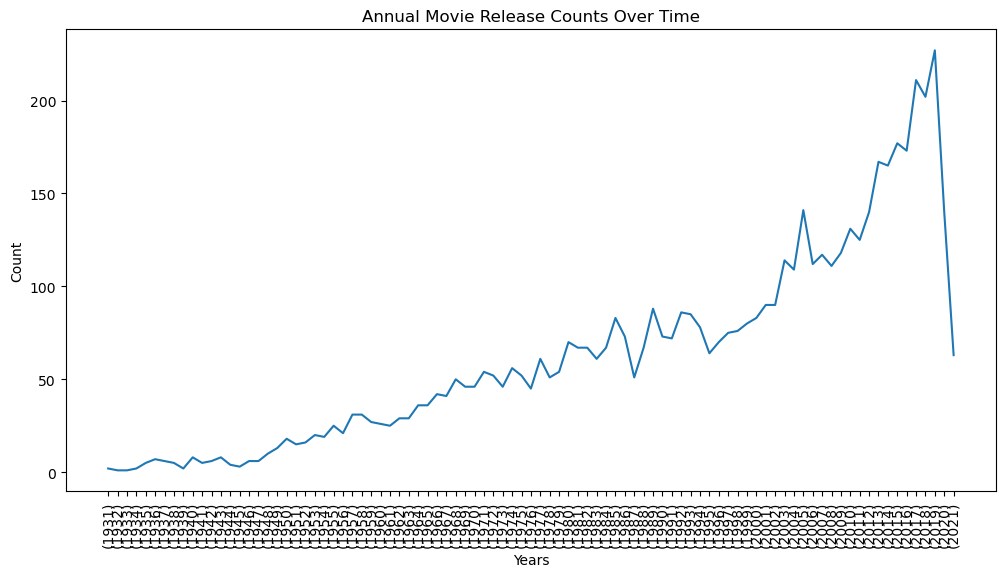

In [25]:
yearly_counts = df['Year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_counts)
ax.set(title="Annual Movie Release Counts Over Time",
       xlabel="Years",
       ylabel="Count")

plt.xticks(rotation=90)
plt.show()

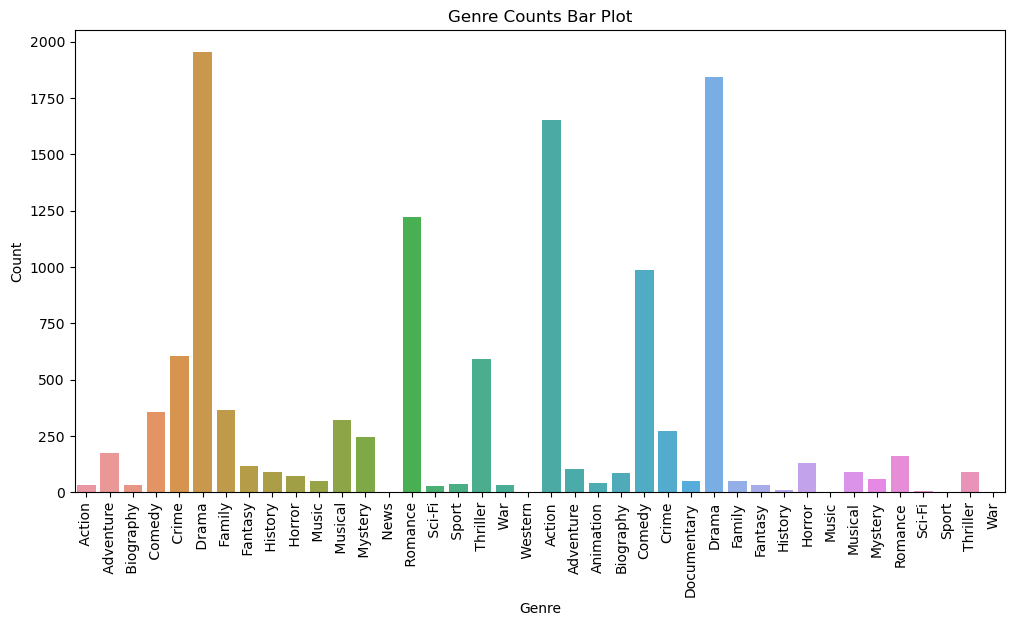

In [28]:
genreLabels = sorted(genre_counts.keys())
genreCounts = [genre_counts[label] for label in genreLabels]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation=90)
ax.set_title("Genre Counts Bar Plot")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.show()

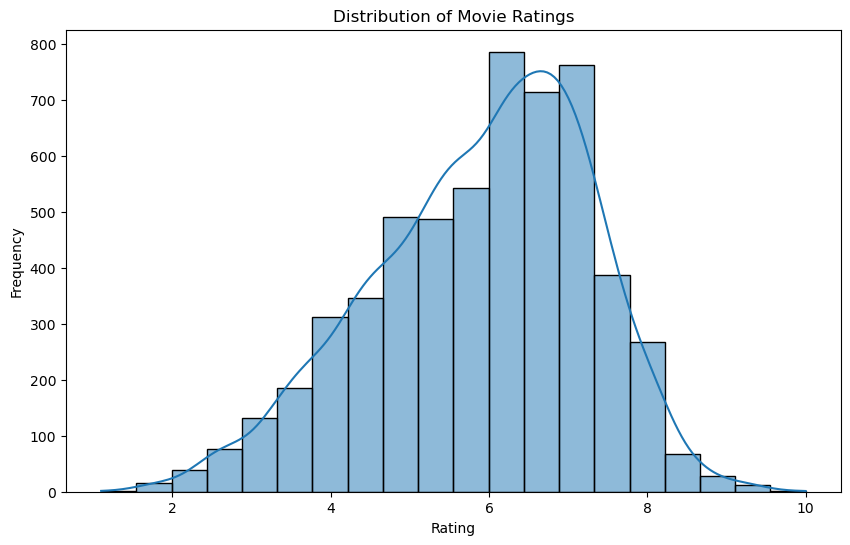

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Rating", bins=20, kde=True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()


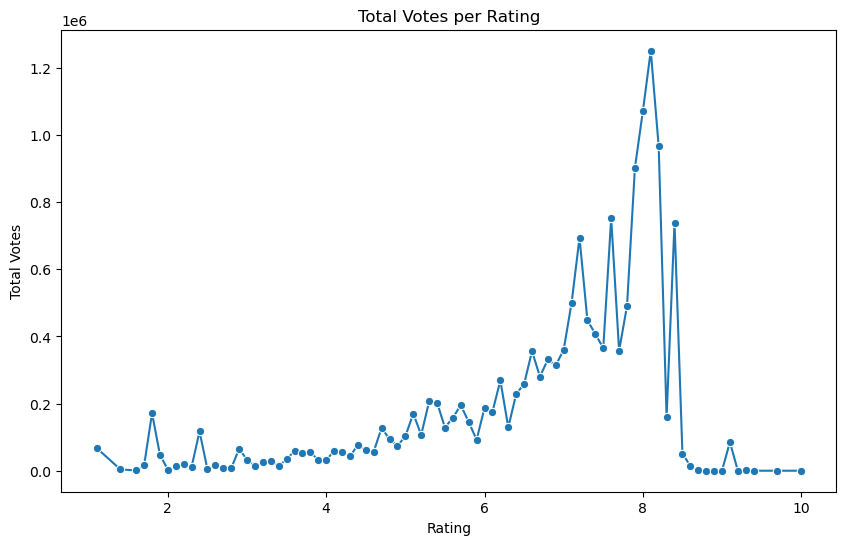

In [30]:
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()


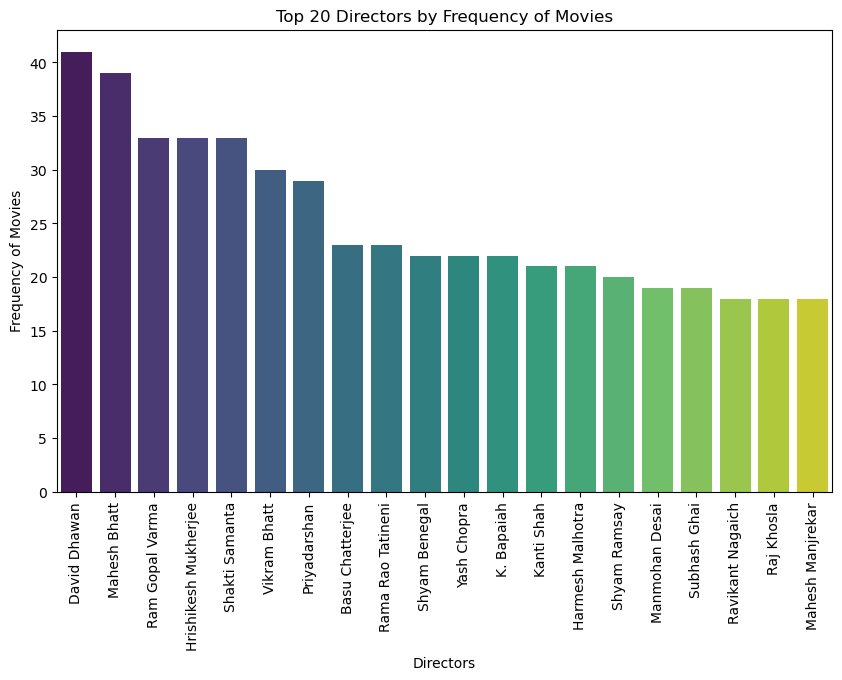

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

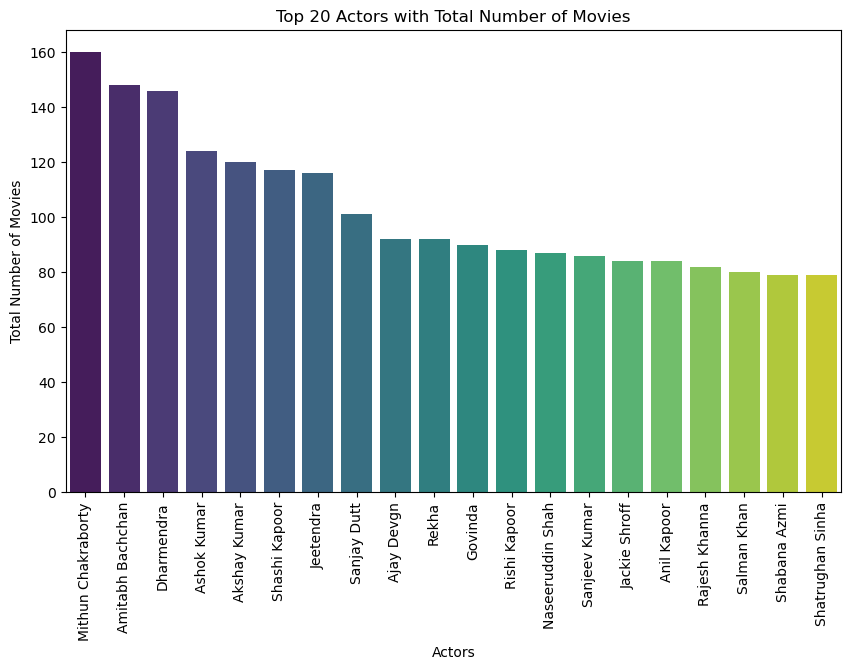

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

SPILITING THE DATASET

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

In [43]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [44]:
columns_to_drop = ['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df.drop(columns_to_drop, axis=1)

# Set 'Rating' as the target variable
y = df['Rating']

In [45]:
print(X)
print(y)

         Year  Duration  Votes
1      2019.0     109.0      8
3      2019.0     110.0     35
5      1997.0     147.0    827
6      2005.0     142.0   1086
8      2012.0      82.0    326
...       ...       ...    ...
15493  2015.0     115.0    408
15494  2001.0     153.0   1496
15503  1989.0     125.0     44
15505  1999.0     129.0    655
15508  1998.0     130.0     20

[5659 rows x 3 columns]
1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


MODELING

In [55]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [57]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [61]:
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [62]:
y_linear_pred = linear_model.predict(x_test)
y_tree_pred = decision_tree_model.predict(x_test)

In [63]:
linear_mse = mean_squared_error(y_test, y_linear_pred)
linear_r2 = r2_score(y_test, y_linear_pred)

In [64]:
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

In [65]:
lr_preds = linear_model.predict(x_test) 

dt_preds = decision_tree_model.predict(x_test) 

In [78]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("\n")

# Evaluate Linear Regression
LRScore = evaluate_model(y_test, lr_preds, "Linear Regression")

# Evaluate Decision Tree
DTScore = evaluate_model(y_test, dt_preds, "Decision Tree")

Model: Linear Regression
Mean Squared Error: 1.67
R-squared: 0.10


Model: Decision Tree
Mean Squared Error: 2.76
R-squared: -0.49


